# Blade Element Momentum model

This is an example of implementation of a Blade Element Momentum model for application to an horizontal axis wind turbine and propeller:
1. in steady, uniform, axial flow.
2. implementing corrections for heavily loaded streamtubes.
3. implementing corrections for finite number of blades in a finite tip speed ratio.

## Tutorial support
In the *iframe* below, you can find the tutorial available at https://csimaoferreira.github.io/Rotor-Wake-Aerodynamics-BEM/#/

In [1]:
from IPython.display import IFrame

In [3]:
Ct = 0
!git add *

xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools), missing xcrun at: /Library/Developer/CommandLineTools/usr/bin/xcrun


In [4]:
!git add *

The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory


In [5]:
!git commit -m "assignment 1 polar alpha update"

[master bdba965] assignment 1 polar alpha update
 3 files changed, 58 insertions(+), 12 deletions(-)


In [6]:
!git push

To https://github.com/olafnekeman/wind_turbine_aeroelasticity.git
   a5f39a0..bdba965  master -> master


In [2]:
IFrame(src='https://csimaoferreira.github.io/Rotor-Wake-Aerodynamics-BEM/#/', width=1000, height=600)

## Definition of required functions

In [3]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np  

In [4]:
def CTfunction(a, glauert = False):
    """
    This function calculates the thrust coefficient as a function of induction factor 'a'
    'glauert' defines if the Glauert correction for heavily loaded rotors should be used; default value is false
    """
    CT = np.zeros(np.shape(a))
    CT = 4*a*(1-a)  
    if glauert:
        CT1=1.816;
        a1=1-np.sqrt(CT1)/2;
        CT[a>a1] = CT1-4*(np.sqrt(CT1)-1)*(1-a[a>a1])
    
    return CT
  
    
def ainduction(CT):
    """
    This function calculates the induction factor 'a' as a function of thrust coefficient CT 
    including Glauert's correction
    """
    a = np.zeros(np.shape(CT))
    CT1=1.816;
    CT2=2*np.sqrt(CT1)-CT1
    a[CT>=CT2] = 1 + (CT[CT>=CT2]-CT1)/(4*(np.sqrt(CT1)-1))
    a[CT<CT2] = 0.5-0.5*np.sqrt(1-CT[CT<CT2])
    return a

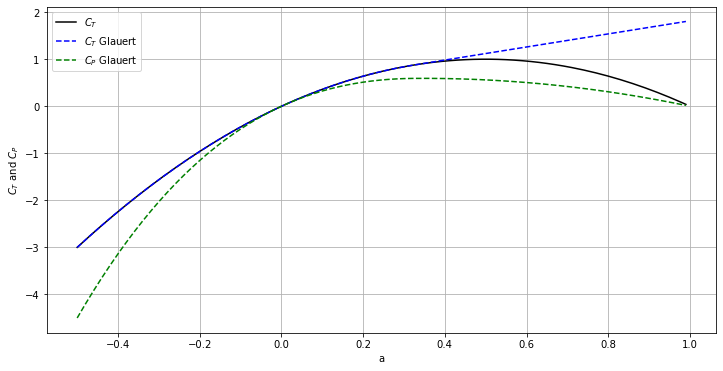

In [5]:
# plot CT as a function of induction "a", with and without Glauert correction
# define a as a range
a = np.arange(-.5,1,.01)
CTmom = CTfunction(a) # CT without correction
CTglauert = CTfunction(a, True) # CT with Glauert's correction
a2 = ainduction(CTglauert)

fig1 = plt.figure(figsize=(12, 6))
plt.plot(a, CTmom, 'k-', label='$C_T$')
plt.plot(a, CTglauert, 'b--', label='$C_T$ Glauert')
plt.plot(a, CTglauert*(1-a), 'g--', label='$C_P$ Glauert')
plt.xlabel('a')
plt.ylabel(r'$C_T$ and $C_P$')
plt.grid()
plt.legend()
plt.show()


In [6]:
def PrandtlTipRootCorrection(r_R, rootradius_R, tipradius_R, TSR, NBlades, axial_induction):
    """
    This function calcualte steh combined tip and root Prandtl correction at agiven radial position 'r_R' (non-dimensioned by rotor radius), 
    given a root and tip radius (also non-dimensioned), a tip speed ratio TSR, the number lf blades NBlades and the axial induction factor
    """
    temp1 = -NBlades/2*(tipradius_R-r_R)/r_R*np.sqrt( 1+ ((TSR*r_R)**2)/((1-axial_induction)**2))
    Ftip = np.array(2/np.pi*np.arccos(np.exp(temp1)))
    Ftip[np.isnan(Ftip)] = 0
    temp1 = NBlades/2*(rootradius_R-r_R)/r_R*np.sqrt( 1+ ((TSR*r_R)**2)/((1-axial_induction)**2))
    Froot = np.array(2/np.pi*np.arccos(np.exp(temp1)))
    Froot[np.isnan(Froot)] = 0
    return Froot*Ftip, Ftip, Froot


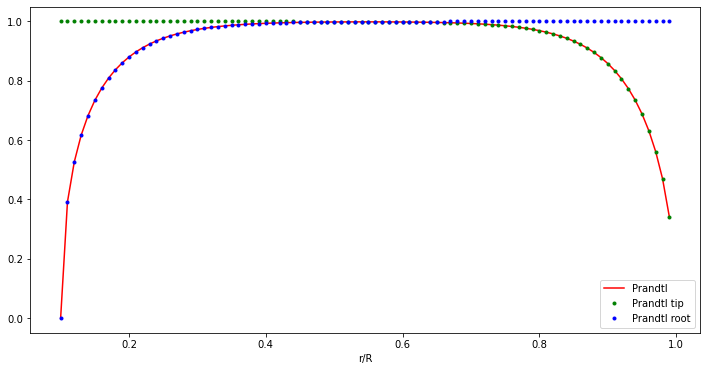

In [7]:
# plot Prandtl tip, root and combined correction for a number of blades and induction 'a', over the non-dimensioned radius
r_R = np.arange(0.1, 1, .01)
a = np.zeros(np.shape(r_R))+0.3
Prandtl, Prandtltip, Prandtlroot = PrandtlTipRootCorrection(r_R, 0.1, 1, 7, 3, a)

fig1 = plt.figure(figsize=(12, 6))
plt.plot(r_R, Prandtl, 'r-', label='Prandtl')
plt.plot(r_R, Prandtltip, 'g.', label='Prandtl tip')
plt.plot(r_R, Prandtlroot, 'b.', label='Prandtl root')
plt.xlabel('r/R')
plt.legend()
plt.show()




In [8]:
# import polar

import pandas as pd

airfoil = 'DU95W180.cvs'
airfoil = 'ARAD8polar.csv'

data1=pd.read_csv(airfoil, header=0,
                    names = ["alfa", "cl", "cd", "cm"],  sep='\s+')
polar_alpha = data1['alfa'][:]
polar_cl = data1['cl'][:]
polar_cd = data1['cd'][:]

import numpy as np

a =[]
a.append([1,2,3])
a.append([4,5,6])
a = np.array(a)


In [9]:
airfoil.split('.')[0]

'ARAD8polar'

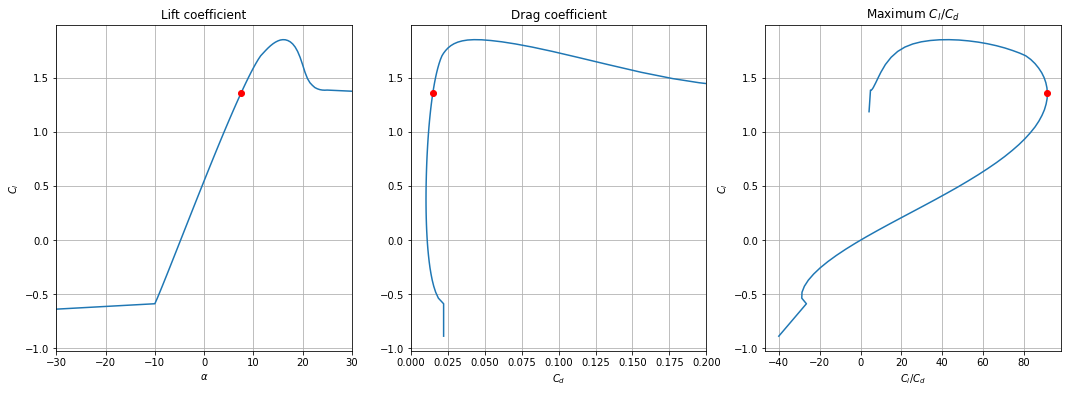

In [10]:
# plot polars of the airfoil C-alfa and Cl-Cd
index = np.argmax(polar_cl/polar_cd)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].plot(polar_alpha, polar_cl)
axs[0].plot(polar_alpha[index], polar_cl[index], 'ro')
axs[0].set_xlim([-30,30])
axs[0].set_xlabel(r'$\alpha$')
axs[0].set_ylabel(r'$C_l$')
axs[0].set_title('Lift coefficient')
axs[0].grid()
axs[1].plot(polar_cd, polar_cl)
axs[1].plot(polar_cd[index], polar_cl[index], 'ro')
axs[1].set_xlim([0,.2])
axs[1].set_xlabel(r'$C_d$')
axs[1].set_title('Drag coefficient')
axs[1].grid()
axs[2].plot(polar_cl/polar_cd, polar_cl)
axs[2].plot(polar_cl[index]/polar_cd[index], polar_cl[index], 'ro')
axs[2].set_xlabel(r'$C_l$'+'/'+r'$C_d$')
axs[2].set_ylabel(r'$C_l$')
axs[2].set_title('Maximum '+r'$C_l$'+'/'+r'$C_d$')
axs[2].grid()


plt.show()

fig.savefig('{}_polar_plots.png'.format(airfoil.split('.')[0]))

In [11]:
i = np.argmax(polar_cl/polar_cd)
polar_cl[i], polar_cd[i]

(1.3596, 0.01485)

In [12]:
# define function to determine load in the blade element
def loadBladeElement(vnorm, vtan, r_R, chord, twist, polar_alpha, polar_cl, polar_cd):
    """
    calculates the load in the blade element
    """
    vmag2 = vnorm**2 + vtan**2
    inflowangle = np.arctan2(vnorm,vtan)
    alpha = twist + inflowangle*180/np.pi
    cl = np.interp(alpha, polar_alpha, polar_cl)
    cd = np.interp(alpha, polar_alpha, polar_cd)
    lift = 0.5*vmag2*cl*chord
    drag = 0.5*vmag2*cd*chord
    fnorm = lift*np.cos(inflowangle)+drag*np.sin(inflowangle)
    ftan = lift*np.sin(inflowangle)-drag*np.cos(inflowangle)
    gamma = 0.5*np.sqrt(vmag2)*cl*chord
    return fnorm , ftan, gamma

def solveStreamtube(Uinf, r1_R, r2_R, rootradius_R, tipradius_R , Omega, Radius, NBlades, chord, twist, polar_alpha, polar_cl, polar_cd ):
    """
    solve balance of momentum between blade element load and loading in the streamtube
    input variables:
    Uinf - wind speed at infinity
    r1_R,r2_R - edges of blade element, in fraction of Radius ;
    rootradius_R, tipradius_R - location of blade root and tip, in fraction of Radius ;
    Radius is the rotor radius
    Omega -rotational velocity
    NBlades - number of blades in rotor
    """
    Area = np.pi*((r2_R*Radius)**2-(r1_R*Radius)**2) #  area streamtube
    r_R = (r1_R+r2_R)/2 # centroide
    # initiatlize variables
    a = 0.0 # axial induction
    aline = 0.0 # tangential induction factor
    
    Niterations = 100
    Erroriterations =0.00001 # error limit for iteration rpocess, in absolute value of induction
    
    for i in range(Niterations):
        # ///////////////////////////////////////////////////////////////////////
        # // this is the block "Calculate velocity and loads at blade element"
        # ///////////////////////////////////////////////////////////////////////
        Urotor = Uinf*(1-a) # axial velocity at rotor
        Utan = (1+aline)*Omega*r_R*Radius # tangential velocity at rotor
        # calculate loads in blade segment in 2D (N/m)
        fnorm, ftan, gamma = loadBladeElement(Urotor, Utan, r_R,chord, twist, polar_alpha, polar_cl, polar_cd)
        load3Daxial =fnorm*Radius*(r2_R-r1_R)*NBlades # 3D force in axial direction
        # load3Dtan =loads[1]*Radius*(r2_R-r1_R)*NBlades # 3D force in azimuthal/tangential direction (not used here)
      
        # ///////////////////////////////////////////////////////////////////////
        # //the block "Calculate velocity and loads at blade element" is done
        # ///////////////////////////////////////////////////////////////////////

        # ///////////////////////////////////////////////////////////////////////
        # // this is the block "Calculate new estimate of axial and azimuthal induction"
        # ///////////////////////////////////////////////////////////////////////
        # // calculate thrust coefficient at the streamtube 
        CT = load3Daxial/(0.5*Area*Uinf**2)
        
        # calculate new axial induction, accounting for Glauert's correction
        anew =  ainduction(CT)
        
#         # correct new axial induction with Prandtl's correction
#         Prandtl, Prandtltip, Prandtlroot = PrandtlTipRootCorrection(r_R, rootradius_R, tipradius_R, Omega*Radius/Uinf, NBlades, anew);
#         if (Prandtl < 0.0001): 
#             Prandtl = 0.0001 # avoid divide by zero
#         anew = anew/Prandtl # correct estimate of axial induction
        a = 0.75*a+0.25*anew # for improving convergence, weigh current and previous iteration of axial induction

        # calculate aximuthal induction
        aline = ftan*NBlades/(2*np.pi*Uinf*(1-a)*Omega*2*(r_R*Radius)**2)
        aline =aline/Prandtl # correct estimate of azimuthal induction with Prandtl's correction
        # ///////////////////////////////////////////////////////////////////////////
        # // end of the block "Calculate new estimate of axial and azimuthal induction"
        # ///////////////////////////////////////////////////////////////////////
        
        #// test convergence of solution, by checking convergence of axial induction
        if (np.abs(a-anew) < Erroriterations): 
            # print("iterations")
            # print(i)
            break

    return [a , aline, r_R, fnorm , ftan, gamma]

In [13]:
# define the blade geometry
delta_r_R = .01
r_R = np.arange(0.2, 1+delta_r_R/2, delta_r_R)


# blade shape
pitch = 2 # degrees
pitch_range = np.arange(-5, 15, 0.1)
chord_distribution = 3*(1-r_R)+1 # meters
twist_distribution = -14*(1-r_R)+pitch # degrees



# define flow conditions
Uinf = 1 # unperturbed wind speed in m/s
TSR = 10 # tip speed ratio
Radius = 50
Omega = Uinf*TSR/Radius
NBlades = 3

TipLocation_R =  1
RootLocation_R =  0.2


# solve BEM model

pitch_ct = np.zeros([len(pitch_range),3])

for j, pitch in enumerate(pitch_range):
    results =np.zeros([len(r_R)-1,6])
    twist_distribution = -14*(1-r_R)+pitch # degrees
    for i in range(len(r_R)-1):
        chord = np.interp((r_R[i]+r_R[i+1])/2, r_R, chord_distribution)
        twist = np.interp((r_R[i]+r_R[i+1])/2, r_R, twist_distribution)

        results[i,:] = solveStreamtube(Uinf, r_R[i], r_R[i+1], RootLocation_R, TipLocation_R , Omega, Radius, NBlades, chord, twist, polar_alpha, polar_cl, polar_cd )
        
    areas = (r_R[1:]**2-r_R[:-1]**2)*np.pi*Radius**2
    dr = (r_R[1:]-r_R[:-1])*Radius
    CT = np.sum(dr*results[:,3]*NBlades/(0.5*Uinf**2*np.pi*Radius**2))
    CP = np.sum(dr*results[:,4]*results[:,2]*NBlades*Radius*Omega/(0.5*Uinf**3*np.pi*Radius**2))
    pitch_ct[j,:] = (pitch, CT, CP)
    if j%20==0:
        print('we are at {} iterations'.format(j))
    


In [14]:
# plot results


areas = (r_R[1:]**2-r_R[:-1]**2)*np.pi*Radius**2
dr = (r_R[1:]-r_R[:-1])*Radius
CT = np.sum(dr*results[:,3]*NBlades/(0.5*Uinf**2*np.pi*Radius**2))
CP = np.sum(dr*results[:,4]*results[:,2]*NBlades*Radius*Omega/(0.5*Uinf**3*np.pi*Radius**2))


print("CT is ", CT)
print("CP is ", CP)



CT is  0.8106672173810273
CP is  0.47129566701583014


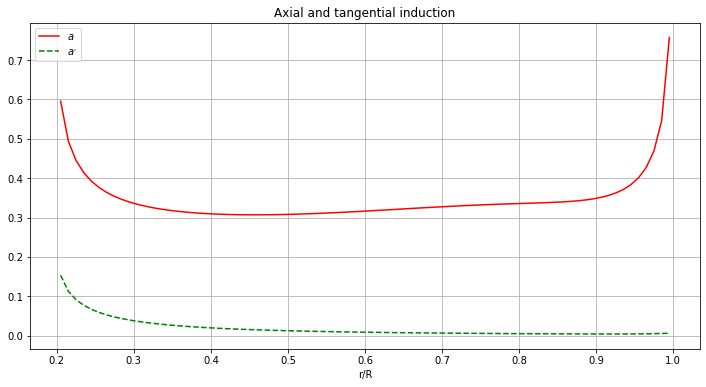

In [15]:


fig1 = plt.figure(figsize=(12, 6))
plt.title('Axial and tangential induction')
plt.plot(results[:,2], results[:,0], 'r-', label=r'$a$')
plt.plot(results[:,2], results[:,1], 'g--', label=r'$a^,$')
plt.grid()
plt.xlabel('r/R')
plt.legend()
plt.show()
fig1.savefig('base_a_axial, a_tang vs r_R.png' )

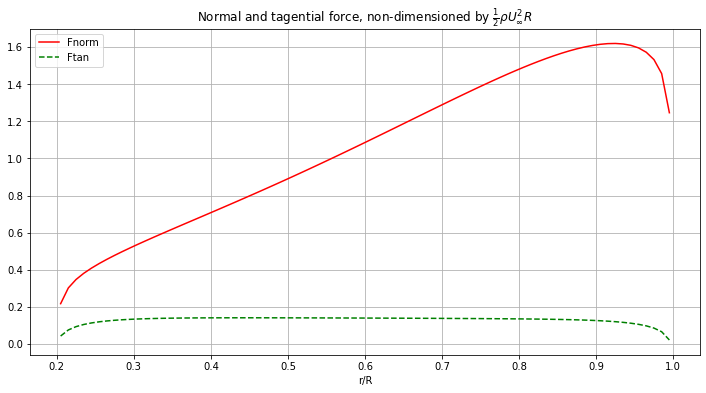

In [16]:
fig1 = plt.figure(figsize=(12, 6))
plt.title(r'Normal and tagential force, non-dimensioned by $\frac{1}{2} \rho U_\infty^2 R$')
plt.plot(results[:,2], results[:,3]/(0.5*Uinf**2*Radius), 'r-', label=r'Fnorm')
plt.plot(results[:,2], results[:,4]/(0.5*Uinf**2*Radius), 'g--', label=r'Ftan')
plt.grid()
plt.xlabel('r/R')
plt.legend()
plt.show()
fig1.savefig('base_F_norm, F_tan vs. r_R.png')

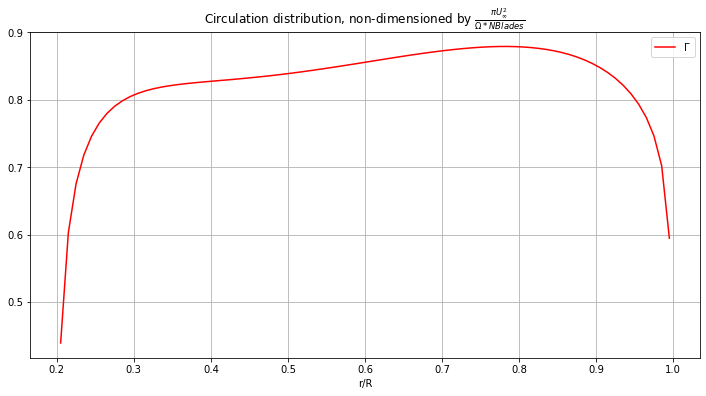

In [17]:
fig1 = plt.figure(figsize=(12, 6))
plt.title(r'Circulation distribution, non-dimensioned by $\frac{\pi U_\infty^2}{\Omega * NBlades } $')
plt.plot(results[:,2], results[:,5]/(np.pi*Uinf**2/(NBlades*Omega)), 'r-', label=r'$\Gamma$')
plt.grid()
plt.xlabel('r/R')
plt.legend()
plt.show()
fig1.savefig('base_Circulation distribution vs. r_R.png')

In [18]:
airfoil = 'ARAD8polar.csv'
data1=pd.read_csv(airfoil, header=0,
                    names = ["alfa", "cl", "cd", "cm"],  sep='\s+')

In [19]:
import numpy as np
np.seterr(all='warn')
A = np.array([10])
a=A[-1]
a**a

1410065408

In [4]:

plt.figure()
x = np.arange(1,10,1)
for i in range(3):
    plt.plot(x, x)

<Figure size 432x288 with 0 Axes>

In [5]:
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])